# Dashboard

In [1]:
import pandas as pd 
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from IPython.core import display as ICD
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [176]:
def extract_info(name):
    frequency,support,*group,dataset_filter,other=name.split("-")
    frequency = frequency.split("/")[1]
    return frequency,support,group[0][1:]+'-'+group[1][:-1],dataset_filter

files = !ls results/*groups.dat
group_stats = [] 
columns = ["file_name","frequency","support","group_size","dataset_filter","nb_groups","nb_users","mean_user_per_group"]
for i in files :
    df = pd.read_csv(i,index_col=0)
    nb_users,nb_groups = df[["user_id","group_id"]].nunique()
    user_per_group = df.groupby(["group_id"]).user_id.count().reset_index(name="nb_users").groupby('nb_users').group_id.count().reset_index(name="nb_groups")
    mean_user_per_group= (user_per_group["nb_users"]*user_per_group["nb_groups"]/df["group_id"].nunique()).sum()
    group_stats.append((i,*extract_info(i),nb_groups,nb_users,mean_user_per_group))
group_stats = pd.DataFrame(group_stats,columns=columns).sort_values("nb_groups")
ICD.display(group_stats.head(10).sort_values("mean_user_per_group",ascending=False))
ICD.display(group_stats.tail(10))

,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,mean_user_per_group
2,results/3M-10-[2-100]-rating>4-groups.dat,3M,10,2-100,rating>4,2,15,11.5
3,results/3M-10-[2-100]-rating==5-groups.dat,3M,10,2-100,rating==5,2,15,11.5
6,results/3M-10-[2-10]-rating>4-groups.dat,3M,10,2-10,rating>4,2,15,11.5
7,results/3M-10-[2-10]-rating==5-groups.dat,3M,10,2-10,rating==5,2,15,11.5
15,results/3M-10-[2-5]-rating==5-groups.dat,3M,10,2-5,rating==5,2,15,11.5
54,results/3M-5-[2-100]-rating<3-groups.dat,3M,5,2-100,rating<3,2,9,5.0
64,results/3M-5-[2-20]-rating<3-groups.dat,3M,5,2-20,rating<3,2,9,5.0
69,results/3M-5-[2-5]-rating<3-groups.dat,3M,5,2-5,rating<3,2,9,5.0
59,results/3M-5-[2-10]-rating<3-groups.dat,3M,5,2-10,rating<3,2,9,5.0
157,results/M-2-[20-50]-rating==5-groups.dat,M,2,20-50,rating==5,2,4,2.0


,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,mean_user_per_group
121,results/6M-2-[2-20]-rating>3-groups.dat,6M,2,2-20,rating>3,32137,597,4.469334
109,results/6M-2-[2-100]-rating>3-groups.dat,6M,2,2-100,rating>3,33071,597,4.411418
289,results/Y-5-[2-5]-rating>3-groups.dat,Y,5,2-5,rating>3,37728,548,7.121024
279,results/Y-5-[2-10]-rating>3-groups.dat,Y,5,2-10,rating>3,52423,548,6.730672
284,results/Y-5-[2-20]-rating>3-groups.dat,Y,5,2-20,rating>3,53743,548,6.697449
274,results/Y-5-[2-100]-rating>3-groups.dat,Y,5,2-100,rating>3,53905,548,6.692904
264,results/Y-2-[2-5]-rating>3-groups.dat,Y,2,2-5,rating>3,55753,605,5.938819
246,results/Y-2-[2-100]-rating>3-groups.dat,Y,2,2-100,rating>3,55753,605,5.938819
252,results/Y-2-[2-10]-rating>3-groups.dat,Y,2,2-10,rating>3,91515,605,5.321947
258,results/Y-2-[2-20]-rating>3-groups.dat,Y,2,2-20,rating>3,100081,605,5.158951


# DRAFT 

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score


In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
lb = preprocessing.MultiLabelBinarizer()
a = df.groupby(["period","group_id"])["user_id"].apply(lambda x: [z for z in x]).reset_index(name="users")
b = pd.DataFrame(data=lb.fit_transform(a.users))
# a["users"].value_counts(ascending=True)


In [161]:
from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=100)
# kmeans.fit(b)
# labels = kmeans.predict(b)
# a["clusters"] = labels
# a["clusters"].value_counts().reset_index(name="count_values")
# k means determine k
# X=b
# distortions = []
# K = range(10,100)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(X)
#     kmeanModel.fit(X)
#     distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
# La moyenne du nombre d'utilisateur/groupe 
ICD.display(df.groupby(["group_id"]).user_id.count().reset_index(name="nb_users").groupby('nb_users').group_id.count().reset_index(name="nb_groups").sum())
# plt.hist(df.groupby(["period","group_id"]).user_id.count())
# nb_users     135
# nb_groups    536


nb_users     135
nb_groups    536
dtype: int64

5.999999999999999

In [75]:
group_stats[group_stats.dataset_filter=="rating>4"].sort_values(["frequency","support"],ascending=False)

,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,rank
290,results/Y-5-[2-5]-rating>4-groups.dat,Y,5,2-5,rating>4,944,373,2.530831
275,results/Y-5-[2-100]-rating>4-groups.dat,Y,5,2-100,rating>4,951,373,2.549598
280,results/Y-5-[2-10]-rating>4-groups.dat,Y,5,2-10,rating>4,951,373,2.549598
285,results/Y-5-[2-20]-rating>4-groups.dat,Y,5,2-20,rating>4,951,373,2.549598
241,results/Y-2-[20-50]-rating>4-groups.dat,Y,2,20-50,rating>4,78,65,1.200000
265,results/Y-2-[2-5]-rating>4-groups.dat,Y,2,2-5,rating>4,6166,551,11.190563
247,results/Y-2-[2-100]-rating>4-groups.dat,Y,2,2-100,rating>4,6166,551,11.190563
253,results/Y-2-[2-10]-rating>4-groups.dat,Y,2,2-10,rating>4,7286,551,13.223230
259,results/Y-2-[2-20]-rating>4-groups.dat,Y,2,2-20,rating>4,7582,551,13.760436
220,results/Y-15-[2-10]-rating>4-groups.dat,Y,15,2-10,rating>4,3,31,0.096774


In [168]:
def extract_info(name):
    frequency,support,*group,dataset_filter,other=name.split("-")
    frequency = frequency.split("/")[1]
    return frequency,support,group[0][1:]+'-'+group[1][:-1],dataset_filter

files = !ls results/*groups.dat
group_stats = [] 
columns = ["file_name","frequency","support","group_size","dataset_filter","nb_groups","nb_users","mean_user_per_group"]
for i in files :
    df = pd.read_csv(i,index_col=0)
    nb_users,nb_groups = df[["user_id","group_id"]].nunique()
    user_per_group = df.groupby(["group_id"]).user_id.count().reset_index(name="nb_users").groupby('nb_users').group_id.count().reset_index(name="nb_groups")
    mean_user_per_group= (user_per_group["nb_users"]*user_per_group["nb_groups"]/df["group_id"].nunique()).sum()
    group_stats.append((i,*extract_info(i),nb_groups,nb_users,mean_user_per_group))
group_stats = pd.DataFrame(group_stats,columns=columns).sort_values("nb_groups")
ICD.display(group_stats.head(40).sort_values("mean_user_per_group",ascending=False))
ICD.display(group_stats.tail(10))

,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,mean_user_per_group
217,results/Y-15-[2-100]-rating==5-groups.dat,Y,15,2-100,rating==5,3,31,17.666667
220,results/Y-15-[2-10]-rating>4-groups.dat,Y,15,2-10,rating>4,3,31,17.666667
229,results/Y-15-[2-5]-rating==5-groups.dat,Y,15,2-5,rating==5,3,31,17.666667
228,results/Y-15-[2-5]-rating>4-groups.dat,Y,15,2-5,rating>4,3,31,17.666667
224,results/Y-15-[2-20]-rating>4-groups.dat,Y,15,2-20,rating>4,3,31,17.666667
225,results/Y-15-[2-20]-rating==5-groups.dat,Y,15,2-20,rating==5,3,31,17.666667
221,results/Y-15-[2-10]-rating==5-groups.dat,Y,15,2-10,rating==5,3,31,17.666667
216,results/Y-15-[2-100]-rating>4-groups.dat,Y,15,2-100,rating>4,3,31,17.666667
89,results/6M-15-[2-100]-2<rating<4-groups.dat,6M,15,2-100,2<rating<4,4,32,15.000000
95,results/6M-15-[2-5]-2<rating<4-groups.dat,6M,15,2-5,2<rating<4,4,32,15.000000


,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,mean_user_per_group
121,results/6M-2-[2-20]-rating>3-groups.dat,6M,2,2-20,rating>3,32137,597,4.469334
109,results/6M-2-[2-100]-rating>3-groups.dat,6M,2,2-100,rating>3,33071,597,4.411418
289,results/Y-5-[2-5]-rating>3-groups.dat,Y,5,2-5,rating>3,37728,548,7.121024
279,results/Y-5-[2-10]-rating>3-groups.dat,Y,5,2-10,rating>3,52423,548,6.730672
284,results/Y-5-[2-20]-rating>3-groups.dat,Y,5,2-20,rating>3,53743,548,6.697449
274,results/Y-5-[2-100]-rating>3-groups.dat,Y,5,2-100,rating>3,53905,548,6.692904
264,results/Y-2-[2-5]-rating>3-groups.dat,Y,2,2-5,rating>3,55753,605,5.938819
246,results/Y-2-[2-100]-rating>3-groups.dat,Y,2,2-100,rating>3,55753,605,5.938819
252,results/Y-2-[2-10]-rating>3-groups.dat,Y,2,2-10,rating>3,91515,605,5.321947
258,results/Y-2-[2-20]-rating>3-groups.dat,Y,2,2-20,rating>3,100081,605,5.158951


In [71]:
group_stats["rank"] = group_stats.nb_groups/group_stats.nb_users
group_stats.sort_values("rank",ascending=False)

,file_name,frequency,support,group_size,dataset_filter,nb_groups,nb_users,rank
258,results/Y-2-[2-20]-rating>3-groups.dat,Y,2,2-20,rating>3,100081,605,165.423140
252,results/Y-2-[2-10]-rating>3-groups.dat,Y,2,2-10,rating>3,91515,605,151.264463
274,results/Y-5-[2-100]-rating>3-groups.dat,Y,5,2-100,rating>3,53905,548,98.366788
284,results/Y-5-[2-20]-rating>3-groups.dat,Y,5,2-20,rating>3,53743,548,98.071168
279,results/Y-5-[2-10]-rating>3-groups.dat,Y,5,2-10,rating>3,52423,548,95.662409
246,results/Y-2-[2-100]-rating>3-groups.dat,Y,2,2-100,rating>3,55753,605,92.153719
264,results/Y-2-[2-5]-rating>3-groups.dat,Y,2,2-5,rating>3,55753,605,92.153719
289,results/Y-5-[2-5]-rating>3-groups.dat,Y,5,2-5,rating>3,37728,548,68.846715
109,results/6M-2-[2-100]-rating>3-groups.dat,6M,2,2-100,rating>3,33071,597,55.395310
121,results/6M-2-[2-20]-rating>3-groups.dat,6M,2,2-20,rating>3,32137,597,53.830821


In [33]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

['3M-10-[2-100]-2<rating<4-groups.dat',
 '3M-10-[2-100]-rating>3-groups.dat',
 '3M-10-[2-100]-rating>4-groups.dat',
 '3M-10-[2-100]-rating==5-groups.dat',
 '3M-15-[2-100]-rating>3-groups.dat',
 '3M-20-[2-100]-rating>3-groups.dat',
 '3M-2-[2-100]-2<rating<4-groups.dat',
 '3M-2-[2-100]-rating<2-groups.dat',
 '3M-2-[2-100]-rating<3-groups.dat',
 '3M-2-[2-100]-rating>3-groups.dat',
 '3M-2-[2-100]-rating>4-groups.dat',
 '3M-2-[2-100]-rating==5-groups.dat',
 '3M-5-[2-100]-2<rating<4-groups.dat',
 '3M-5-[2-100]-rating<3-groups.dat',
 '3M-5-[2-100]-rating>3-groups.dat',
 '3M-5-[2-100]-rating>4-groups.dat',
 '3M-5-[2-100]-rating==5-groups.dat',
 '6M-10-[2-100]-2<rating<4-groups.dat',
 '6M-10-[2-100]-rating>3-groups.dat',
 '6M-10-[2-100]-rating>4-groups.dat',
 '6M-10-[2-100]-rating==5-groups.dat',
 '6M-15-[2-100]-2<rating<4-groups.dat',
 '6M-15-[2-100]-rating>3-groups.dat',
 '6M-20-[2-100]-rating>3-groups.dat',
 '6M-2-[2-100]-2<rating<4-groups.dat',
 '6M-2-[2-100]-rating<2-groups.dat',
 '6M-2-[2

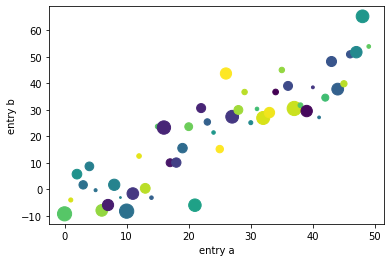

In [9]:
import numpy as np 
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

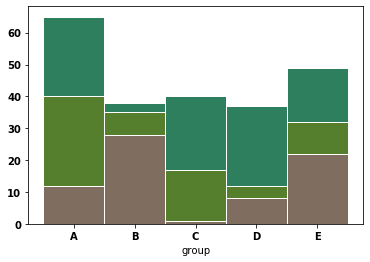

In [20]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()


In [44]:
import seaborn as sns
sns.set()
df.set_index('App').T.plot(kind='bar', stacked=True)

KeyError: 'App'

In [46]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("C:\stacked_bar.csv")
stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

FileNotFoundError: File b'C:\\stacked_bar.csv' does not exist

In [181]:
# a = !ls *.dat
# for i in a:
#     df = pd.read_csv(i)
#     try:
#             print(df.group_id.count(),'||||||||||||',i)
#     except:
#         pass
df = pd.read_csv("Y-15-[2-100]-rating==5-groups.dat")
df

,Unnamed: 0,user_id,group_id,period
0,0,6,2,1996
1,1,38,2,1996
2,2,58,2,1996
3,3,94,2,1996
4,4,107,2,1996
5,5,109,2,1996
6,6,117,2,1996
7,7,130,2,1996
8,8,176,2,1996
9,9,179,2,1996


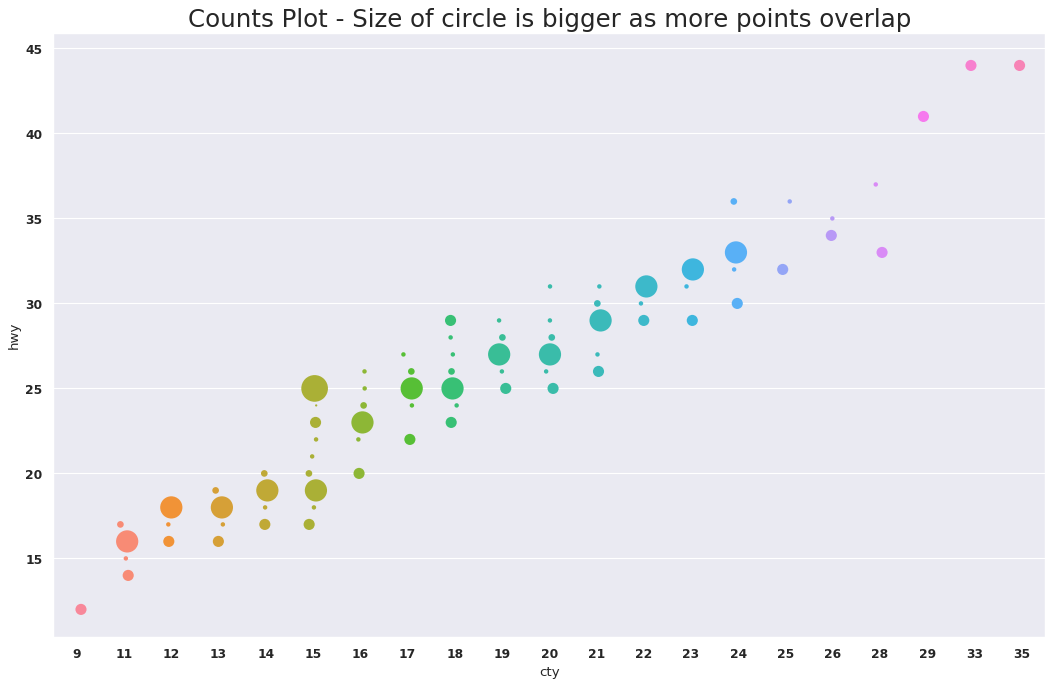

In [151]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()

In [160]:
df.groupby(['hwy', 'cty']).size().reset_index(name='counts').head()

,hwy,cty,counts
0,12,9,5
1,14,11,2
2,15,11,10
3,16,11,3
4,16,12,2


In [161]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


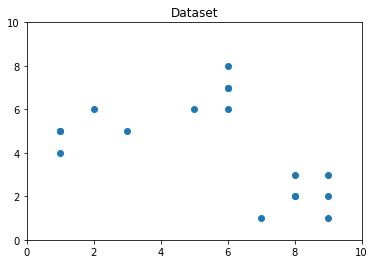

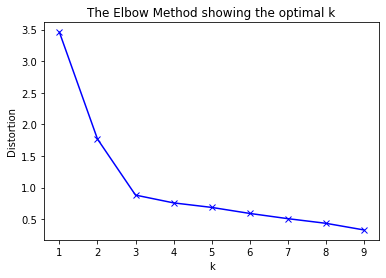

In [47]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()